<a href="https://colab.research.google.com/github/psykeefuego/DS---ML/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 9 - AdaBoost**

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix)


In [ ]:
data=pd.read_csv("iris.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-9-f70487d56dea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr())


<Axes: >

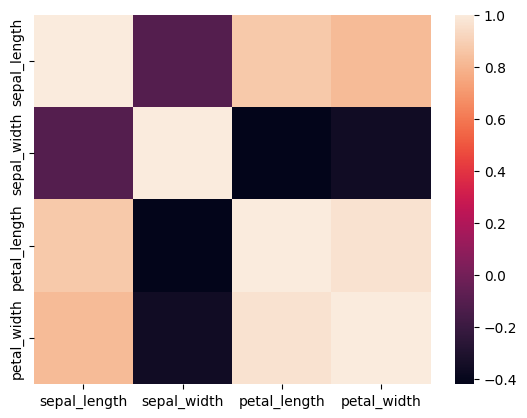

In [ ]:
sb.heatmap(data.corr())

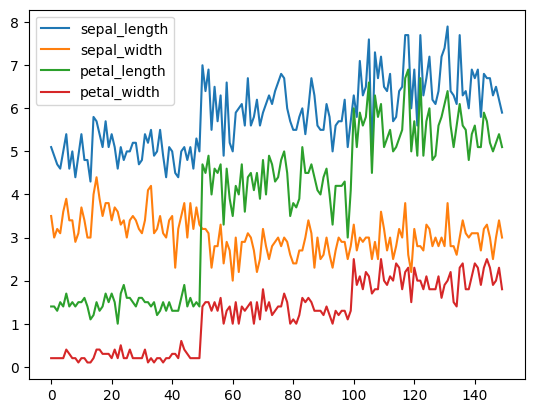

In [ ]:
data.plot()
plt.show()

In [ ]:
x=data.drop("species",axis=1)
y=data["species"]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
model=AdaBoostClassifier(n_estimators=5)
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=5)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.95      0.83      0.88        23
   virginica       0.79      0.94      0.86        16

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



In [ ]:
print(confusion_matrix(y_test,y_predict))

[[21  0  0]
 [ 0 19  4]
 [ 0  1 15]]


IMPLEMENTING ADABOOSTCLLASSIFICATION ON TITANIC DATASET


In [ ]:
d=pd.read_csv("titanic.csv")

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
d.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [ ]:
d.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
d.fillna(d['Age'].median(),inplace=True)

In [ ]:
d['Age'].isnull().sum()

0

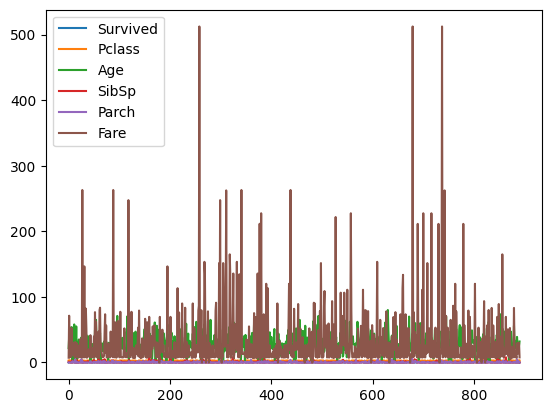

In [ ]:
d.plot()
plt.show()

<ipython-input-73-5e23538b5657>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(d.corr())


<Axes: >

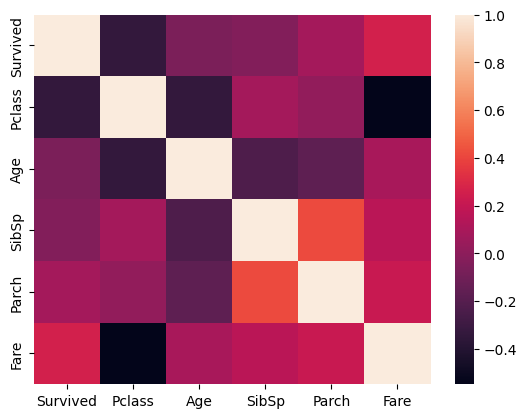

In [ ]:
sb.heatmap(d.corr())

In [ ]:
sex_re={'male':1,'female':0}
emb_re={'S':0,'Q':1,'C':2}
d['Sex'].replace(sex_re,inplace=True)
d['Embarked'].replace(emb_re,inplace=True)

In [ ]:
x=d.drop("Survived",axis=1)
y=d["Survived"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
model1=AdaBoostClassifier(n_estimators=7)
model1.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=7)

In [ ]:
y_predict=model1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.8067226890756303

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       215
           1       0.78      0.72      0.75       142

    accuracy                           0.81       357
   macro avg       0.80      0.79      0.80       357
weighted avg       0.81      0.81      0.81       357



In [ ]:
print(confusion_matrix(y_test,y_predict))

[[186  29]
 [ 40 102]]


COMPARING WITH DIFFERNT MODELS

In [ ]:
model2=GaussianNB()
model2.fit(x_train,y_train)
y_predict=model2.predict(x_test)
accuracy_score(y_test,y_predict)

0.7619047619047619

In [ ]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
y_predict=model3.predict(x_test)
accuracy_score(y_test,y_predict)

0.7759103641456583

In [ ]:
model4=KNeighborsClassifier(n_neighbors=5)
model4.fit(x_train,y_train)
y_predict=model4.predict(x_test)
accuracy_score(y_test,y_predict)

0.6890756302521008

In [ ]:
model5=SVC()
model5.fit(x_train,y_train)
y_predict=model5.predict(x_test)
accuracy_score(y_test,y_predict)

0.6582633053221288

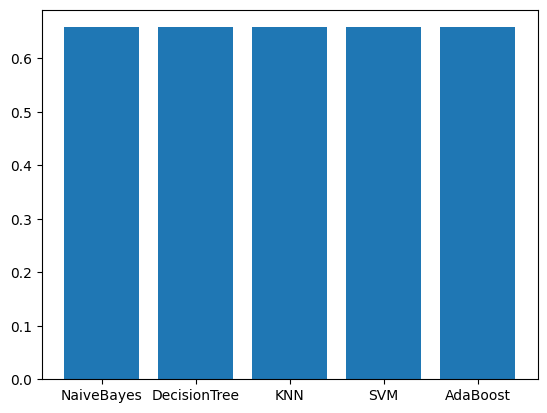

In [ ]:
x_data=['NaiveBayes','DecisionTree','KNN','SVM','AdaBoost']
y_data=[accuracy_score(y_test,y_predict),accuracy_score(y_test,y_predict),accuracy_score(y_test,y_predict),accuracy_score(y_test,y_predict),accuracy_score(y_test,y_predict)]
plt.bar(x_data,y_data)
plt.show()